# Wiggle your big trunk

[John von Neumann](https://en.wikipedia.org/wiki/John_von_Neumann) once famously said: 

<blockquote> With four parameters I can fit an elephant, and with five I can make him wiggle his trunk.</blockquote>

His quote was thoroughly investigated in the [groudbreaking work](https://publications.mpi-cbg.de/Mayer_2010_4314.pdf) of Mayer et al. As a first exercise, base yourself on their paper to plot the elephant shown in their figure (b).

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the function for obtaining the x, y coordinates of the elephant drawing:
def elephant(time, parameters):
    """
    Return the x and y coordinates of an elephant drawing.
    
    Args:
        time (numpy.ndarray): Array of the time mesh for which the elephant coordinates should be determined.
        parameters (List): List of complex parameters
        
    Returns:
        x, y: Coordinates of the elephant drawing.
    
    """
    
    x = np.zeros(time.shape)
    y = np.zeros(time.shape)
    
    A_x = [0, 0, parameters[2].real, 0, parameters[3].real]
    B_x = [parameters[0].real, parameters[1].real, 0, 0, 0]
    
    A_y = [parameters[3].imag, 0, 0, 0, 0]
    B_y = [parameters[0].imag, parameters[1].imag, parameters[2].imag, 0, 0]
    
    for k, ax, bx, ay, by in zip(range(1, 6), A_x, B_x, A_y, B_y):
        y -= ax * np.cos(k * time) + bx * np.sin(k * time)
        x += ay * np.cos(k * time) + by * np.sin(k * time)
        
    return x, y

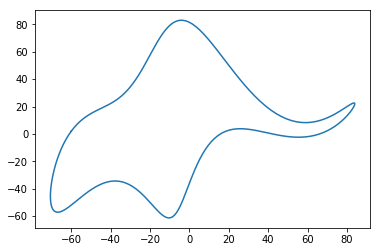

In [2]:
# Based on the parameters of the paper of Mayer et al. and the elephant function, plot the elephant with matplotlib
parameters = [50-30j, 18+8j, 12-10j, -14-60j]

x, y = elephant(np.linspace(0, 2*np.pi, 200), parameters)
plt.plot(x, y);

---

## Wiggling time

Of course, now we want to make the elephant's trunk wiggle. To do this, we will write a function that plots the body and trunk of the elephant separately. First, we have to figure out what part of the time range corresponds to the trunk and the body. One way to figure this out interactively is using a `FloatRangeSlider`. Start by setting up a function for plotting the elephant coordinates within a certain time range:

In [3]:
def plot_elephant(times, parameters):
    """
    Plot the elephant coordinates over the range defined by times, based on the parameters.
    
    Args:
        time (numpy.ndarray): Array of the time mesh for which the elephant coordinates should be determined.
        parameters (List): List of complex parameters
    
    """
    
    time_range = np.linspace(times[0], times[1], 1000)
    x, y = elephant(time_range, parameters)
    plt.plot(x, y)

Now set up a `FloatRangeSlider` that allows you to explore the effect of drawing the coordinates of the elephant over a certain range.

In [4]:
from ipywidgets import FloatRangeSlider, FloatSlider, interact, fixed
time_slider = FloatRangeSlider(value=(0, 2*np.pi), min=0, max=4*np.pi, step=0.01)
interact(plot_elephant, times=time_slider, parameters=fixed(parameters), wiggle_parameter=3.0);

interactive(children=(FloatRangeSlider(value=(0.0, 6.283185307179586), description='times', max=12.56637061435…

Base yourself on the interactive tool you've just designed to figure out what time ranges you have to consider to plot the body and the trunk. Finally, set up a function that plots the body and trunk separately, and changes the position of the trunk a little based on the wiggle parameter. Once the function is set up, you can use the interact tool to plot the elephant and allow for a range of values for the wiggle parameter to wiggle the trunk.

In [5]:
def wiggle_trunk(parameters, wiggle_parameter):

    # Draw the body of the elephant
    x, y = elephant(np.linspace(4.69, 8.89, 1000), parameters)
    plt.plot(x, y)
    
    # Obtain the trunk coordinates
    x, y = elephant(np.linspace(8.89 - 2 * np.pi, 4.69, 1000), parameters)
    
    # Adjust the position of the trunk a little
    for ii in range(len(y)-1):
        y[ii] -= np.sin(((x[ii]-x[0]) * np.pi / len(y))) * wiggle_parameter
    
    plt.plot(x, y)

In [6]:
interact(wiggle_trunk, parameters=fixed(parameters), wiggle_parameter=FloatSlider(value=0, min=-150, max=150));

interactive(children=(FloatSlider(value=0.0, description='wiggle_parameter', max=150.0, min=-150.0), Output())…